In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_raw = pd.read_csv('C:/Users/lode/Downloads/data_science/car sales prediction/Car_sales.csv')
df_raw.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df = df_raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
df.describe(include = 'all')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Dodge,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/5/2012,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN,60.407707
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN,72.030917
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN,89.414878


In [6]:
df = df.drop(['Model'], axis = 1)

In [7]:
df.isnull().sum()

Manufacturer            0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
print('Percentage of missing values :', (df.isnull().values.sum() * 100 / (df.shape[0] * df.shape[1])))

Percentage of missing values : 2.1656050955414012


In [9]:
df_no_mv = df.dropna()

In [10]:
df_no_mv.isnull().sum()

Manufacturer           0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [11]:
df_no_mv.columns.values

array(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype=object)

<Figure size 432x288 with 0 Axes>

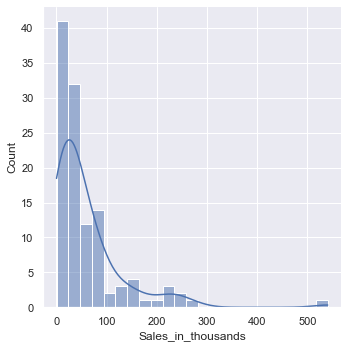

<Figure size 432x288 with 0 Axes>

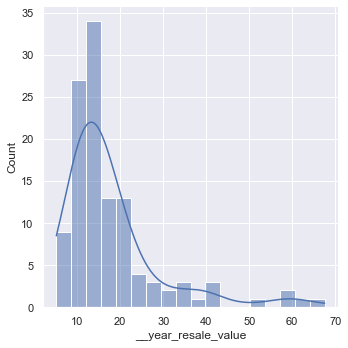

<Figure size 432x288 with 0 Axes>

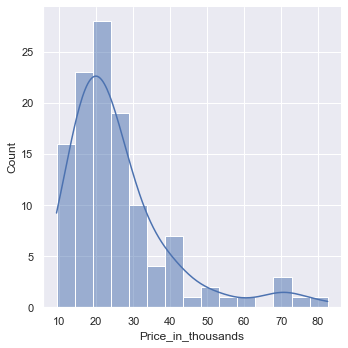

<Figure size 432x288 with 0 Axes>

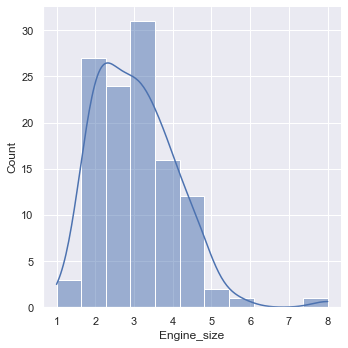

<Figure size 432x288 with 0 Axes>

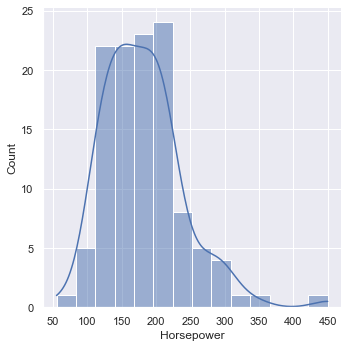

<Figure size 432x288 with 0 Axes>

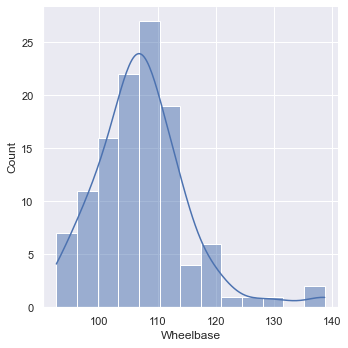

<Figure size 432x288 with 0 Axes>

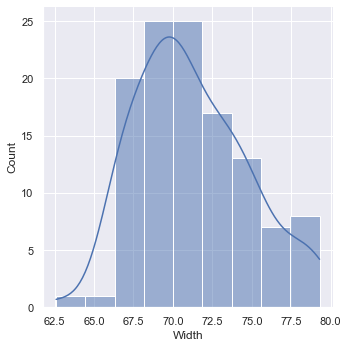

<Figure size 432x288 with 0 Axes>

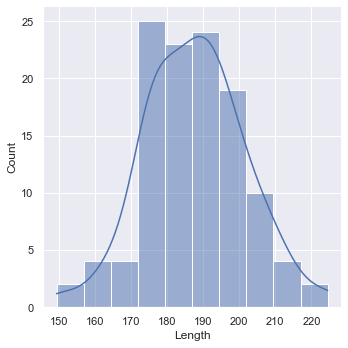

<Figure size 432x288 with 0 Axes>

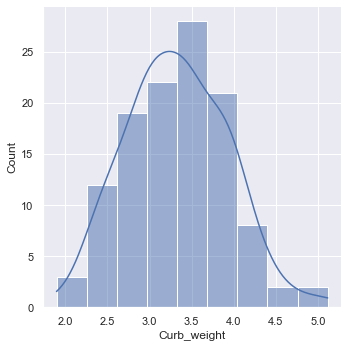

<Figure size 432x288 with 0 Axes>

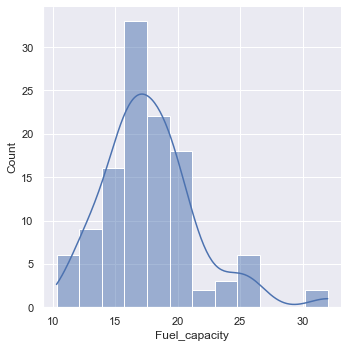

<Figure size 432x288 with 0 Axes>

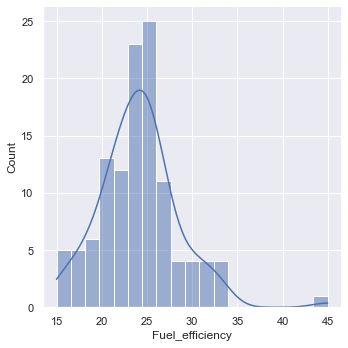

<Figure size 432x288 with 0 Axes>

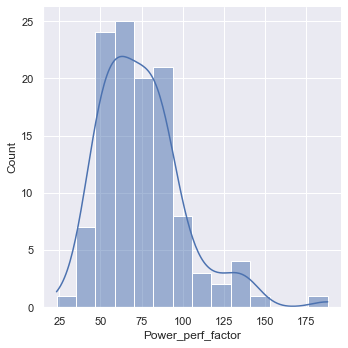

In [12]:
numerical = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
             'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length',
             'Curb_weight', 'Fuel_capacity','Fuel_efficiency', 'Power_perf_factor']

for i in numerical:
    plt.figure()
    sns.displot(x = df_no_mv[i], kde = True)
    plt.show()

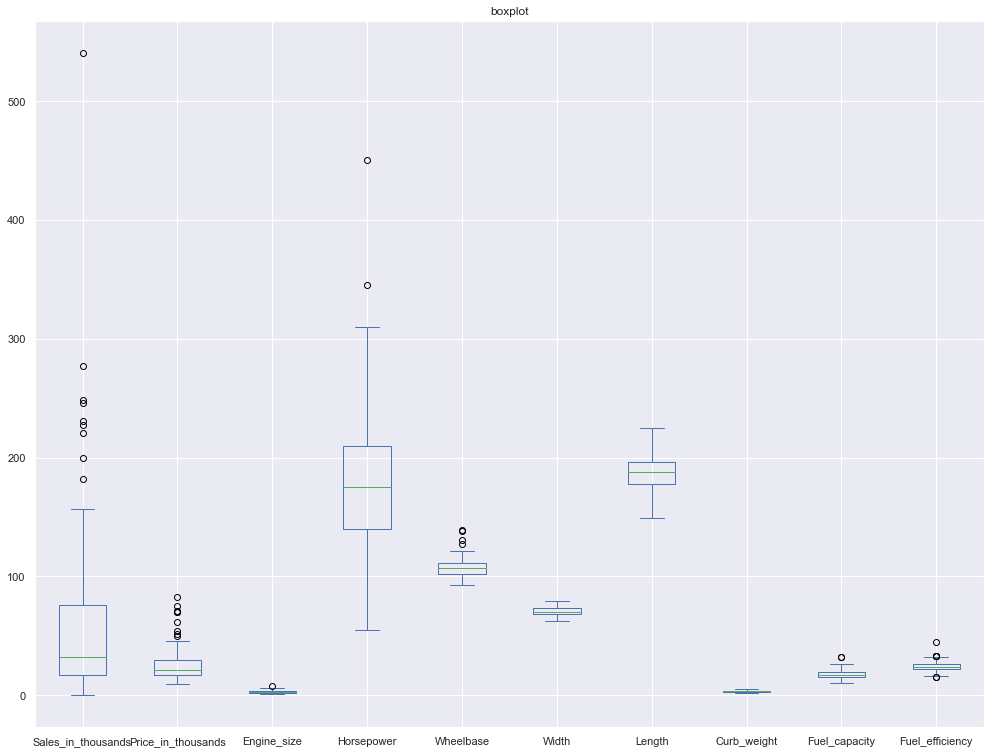

In [13]:
plt.rcParams["figure.figsize"] = [17, 13]
ax = df_no_mv[['Sales_in_thousands', 'Price_in_thousands', 'Engine_size',
            'Horsepower', 'Wheelbase',
       'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']].plot(kind='box', title='boxplot')

In [14]:
numerical = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
             'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length',
             'Curb_weight', 'Fuel_capacity','Fuel_efficiency', 'Power_perf_factor']

upper_outliers = []
lower_outliers = []

for i in numerical:
    q1 = df_no_mv[i].quantile(0.25)
    q3 = df_no_mv[i].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    upper_outliers.append(upper_limit)
    lower_outliers.append(lower_limit)

In [15]:
outliers = pd.DataFrame(upper_outliers, columns = ['upper_outliers'])
outliers['lower_outliers'] = lower_outliers
outliers['features'] = numerical
outliers

,upper_outliers,lower_outliers,features
0,164.922000,-72.126000,Sales_in_thousands
1,32.827500,-1.712500,__year_resale_value
2,48.192500,-1.747500,Price_in_thousands
3,6.200000,-0.200000,Engine_size
4,315.000000,35.000000,Horsepower
5,125.400000,88.600000,Wheelbase
6,81.250000,60.850000,Width
7,225.000000,149.000000,Length
8,5.191000,1.543000,Curb_weight
9,26.550000,8.550000,Fuel_capacity


In [16]:
df_no_mv = df_no_mv[df_no_mv['Sales_in_thousands'] < 164]
df_no_mv = df_no_mv[df_no_mv['__year_resale_value'] < 32]
df_no_mv = df_no_mv[df_no_mv['Price_in_thousands'] < 48]
df_no_mv = df_no_mv[df_no_mv['Engine_size'] < 6.2]
df_no_mv = df_no_mv[df_no_mv['Horsepower'] < 315]
df_no_mv = df_no_mv[df_no_mv['Wheelbase'] < 125]
df_no_mv = df_no_mv[df_no_mv['Width'] < 81]
df_no_mv = df_no_mv[df_no_mv['Length'] < 225]
df_no_mv = df_no_mv[df_no_mv['Curb_weight'] < 5.1]
df_no_mv = df_no_mv[df_no_mv['Fuel_capacity'] < 26.5]
df_no_mv = df_no_mv[df_no_mv['Fuel_efficiency'] < 32]
df_no_mv = df_no_mv[df_no_mv['Power_perf_factor'] < 131]

<Figure size 1224x936 with 0 Axes>

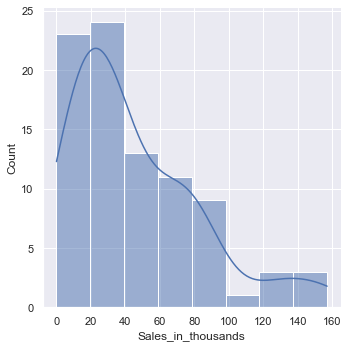

<Figure size 1224x936 with 0 Axes>

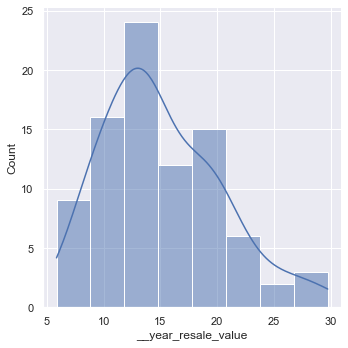

<Figure size 1224x936 with 0 Axes>

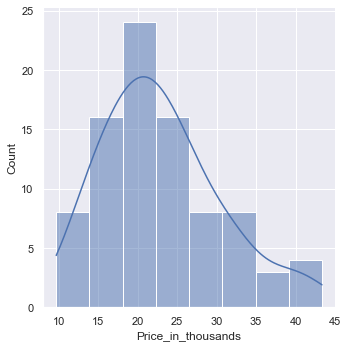

<Figure size 1224x936 with 0 Axes>

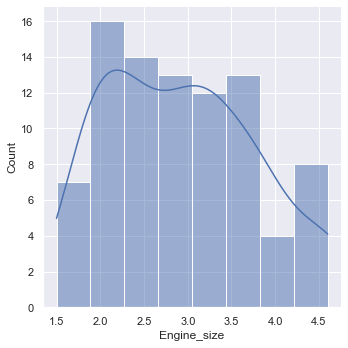

<Figure size 1224x936 with 0 Axes>

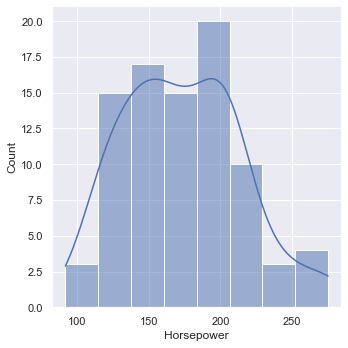

<Figure size 1224x936 with 0 Axes>

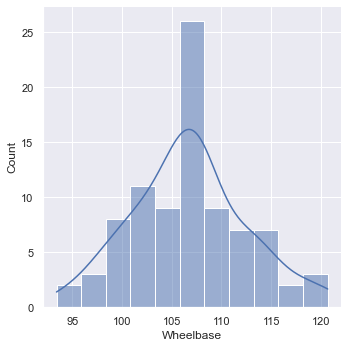

<Figure size 1224x936 with 0 Axes>

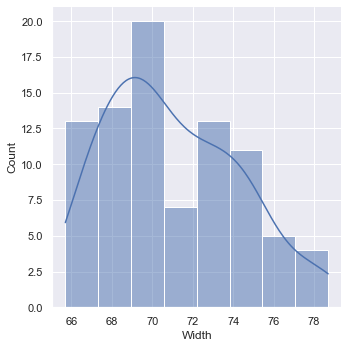

<Figure size 1224x936 with 0 Axes>

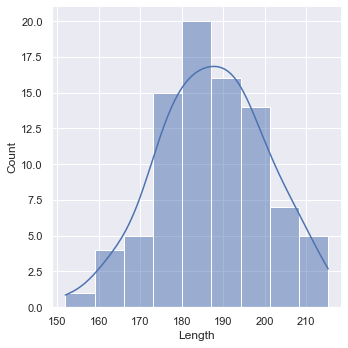

<Figure size 1224x936 with 0 Axes>

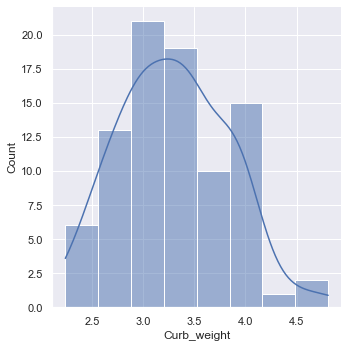

<Figure size 1224x936 with 0 Axes>

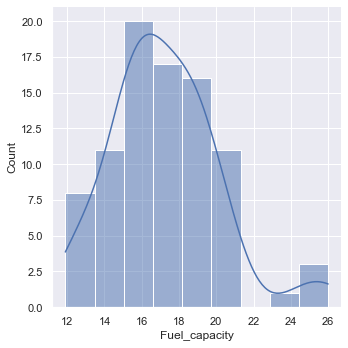

<Figure size 1224x936 with 0 Axes>

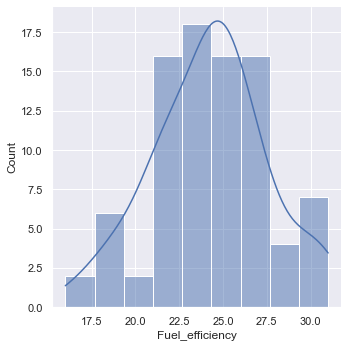

<Figure size 1224x936 with 0 Axes>

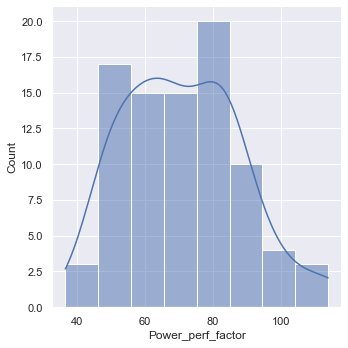

In [17]:
numerical = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
             'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length',
             'Curb_weight', 'Fuel_capacity','Fuel_efficiency', 'Power_perf_factor']

for i in numerical:
    plt.figure()
    sns.displot(x = df_no_mv[i], kde = True)
    plt.show()

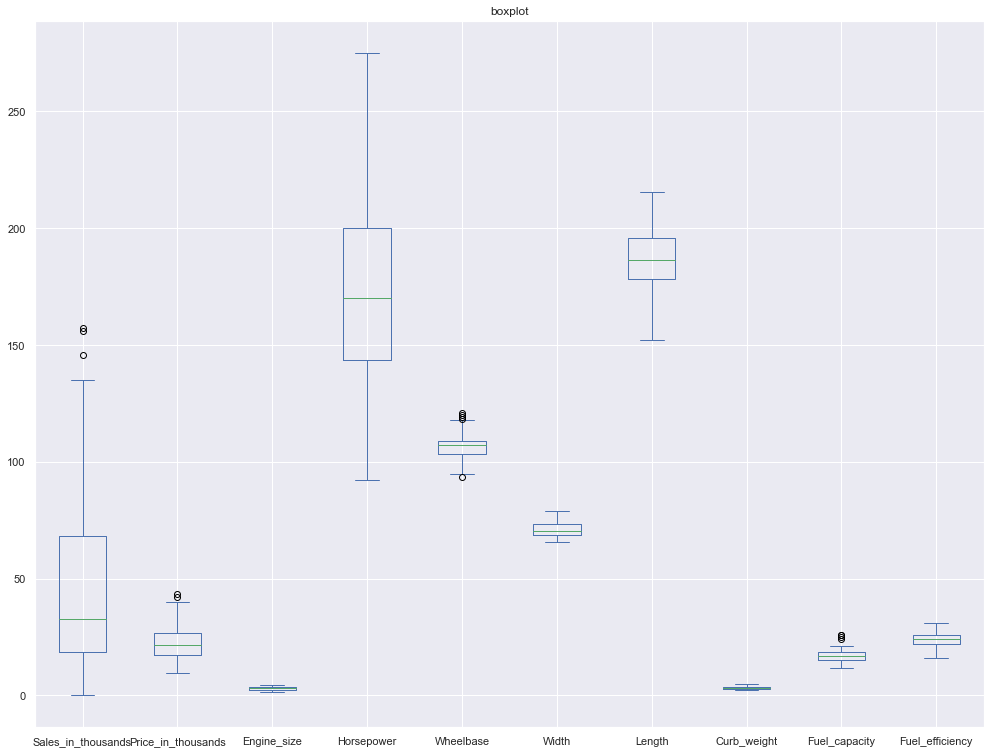

In [18]:
plt.rcParams["figure.figsize"] = [17, 13]
ax = df_no_mv[['Sales_in_thousands', 'Price_in_thousands', 'Engine_size',
            'Horsepower', 'Wheelbase',
       'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']].plot(kind='box', title='boxplot')

In [19]:
df_no_outliers = df_no_mv.copy()

In [20]:
df_no_outliers

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [21]:
type(df_no_outliers['Latest_Launch'][0])

str

In [22]:
df_no_outliers['Latest_Launch'] = pd.to_datetime(df_no_outliers['Latest_Launch'], format = '%m/%d/%Y')

In [23]:
type(df_no_outliers['Latest_Launch'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
def date_to_year(date_value):
    return date_value.year

In [25]:
df_no_outliers['year'] = df_no_outliers['Latest_Launch'].apply(date_to_year)

In [26]:
df_no_outliers

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,year
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2011-01-24,46.943877,2011
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,2011-08-27,47.638237,2011
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,2012-10-30,61.701381,2012
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2011-05-31,48.907372,2011


In [27]:
df_no_outliers['age'] = 2022 - df_no_outliers['year']

In [28]:
df_no_outliers

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,year,age
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,10
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,11
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,11
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,11
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2011-01-24,46.943877,2011,11
146,Volkswagen,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,2011-08-27,47.638237,2011,11
147,Volkswagen,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,2012-10-30,61.701381,2012,10
148,Volkswagen,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2011-05-31,48.907372,2011,11


In [29]:
df_no_outliers['Vehicle_type'] = df_no_outliers['Vehicle_type'].map({'Passenger' : 1, 'Car' : 0})

In [30]:
df_no_outliers.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,year,age
0,Acura,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,10
1,Acura,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,11
3,Acura,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,11
4,Audi,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,11
5,Audi,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,2011,11


In [31]:
columns_todrop = ['Latest_Launch', 'year']

df_no_outliers = df_no_outliers.drop(columns_todrop, axis = 1)

In [32]:
df_no_outliers.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,age
0,Acura,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,Acura,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,Acura,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,Audi,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,Audi,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11


<AxesSubplot:>

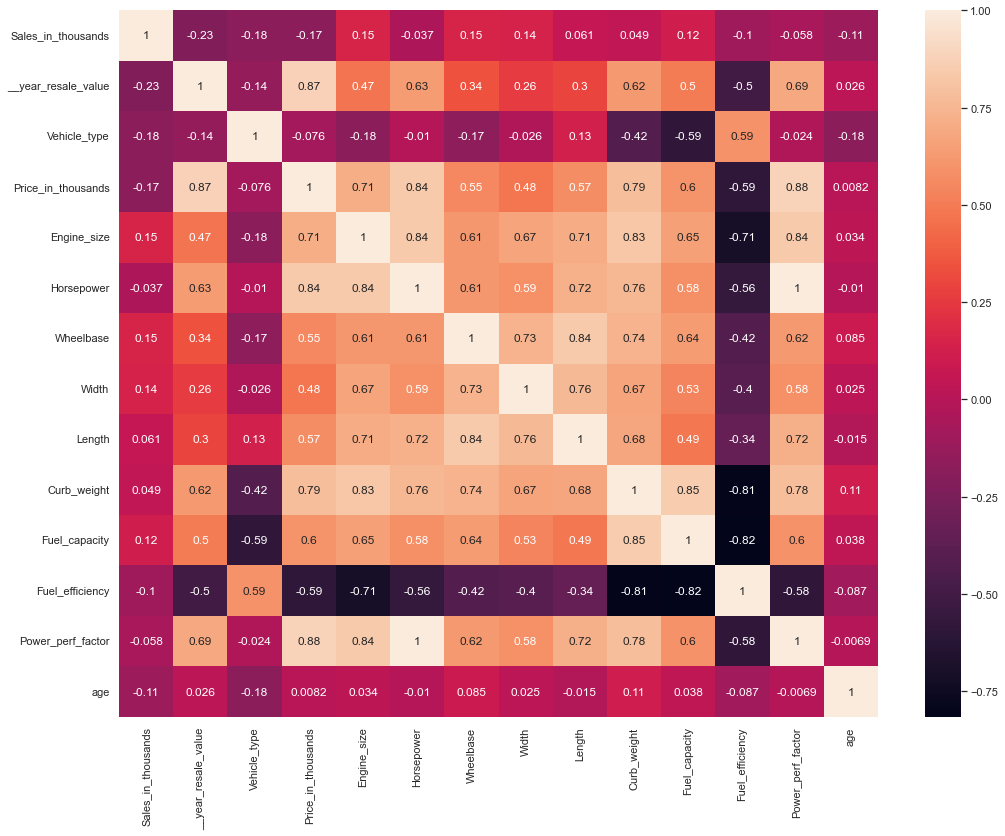

In [33]:
sns.heatmap(df_no_outliers.corr(), annot = True)

In [34]:
df_no_outliers.columns.values

array(['Manufacturer', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor', 'age'], dtype=object)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df_no_outliers[['Sales_in_thousands', '__year_resale_value', 
                            'Engine_size', 'Horsepower', 
                            'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
                            'Fuel_efficiency', 'Power_perf_factor', 'age']]

x = add_constant(variables)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif['Features'] = x.columns

C:\Users\lode\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
vif

,VIF,Features
0,1325.499670,const
1,1.376845,Sales_in_thousands
2,6.267484,__year_resale_value
3,7.955751,Engine_size
4,361.625247,Horsepower
5,5.761349,Wheelbase
6,2.961104,Width
7,6.940621,Length
8,12.569161,Curb_weight
9,5.500652,Fuel_capacity


In [37]:
columns_todrop = ['Engine_size', 'Horsepower', 'Curb_weight', 'Power_perf_factor']

df_no_multicollinear = df_no_outliers.drop(columns_todrop, axis = 1)

In [38]:
df_no_multicollinear

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,age
0,Acura,16.919,16.360,1,21.50,101.2,67.3,172.4,13.2,28.0,10
1,Acura,39.384,19.875,1,28.40,108.1,70.3,192.9,17.2,25.0,11
3,Acura,8.588,29.725,1,42.00,114.6,71.4,196.6,18.0,22.0,11
4,Audi,20.397,22.255,1,23.99,102.6,68.2,178.0,16.4,27.0,11
5,Audi,18.780,23.555,1,33.95,108.7,76.1,192.0,18.5,22.0,11
...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,9.761,11.425,1,14.90,98.9,68.3,163.3,14.5,26.0,11
146,Volkswagen,83.721,13.240,1,16.70,98.9,68.3,172.3,14.5,26.0,11
147,Volkswagen,51.102,16.725,1,21.20,106.4,68.5,184.1,16.4,27.0,10
148,Volkswagen,9.569,16.575,1,19.99,97.4,66.7,160.4,13.7,26.0,11


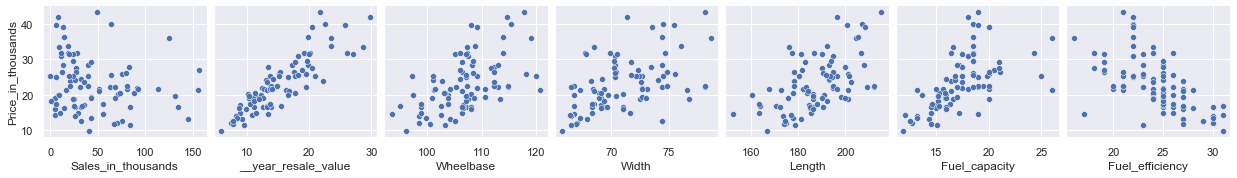

In [39]:
sns.pairplot(df_no_multicollinear, y_vars = 'Price_in_thousands', x_vars = ['Sales_in_thousands', '__year_resale_value',
                                                                           'Wheelbase', 'Width', 'Length', 'Fuel_capacity',
                                                                           'Fuel_efficiency'])

In [40]:
df_with_dummies = pd.get_dummies(data = df_no_multicollinear, columns = ['Manufacturer'], drop_first = True)

In [41]:
df_with_dummies

,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,age,...,Manufacturer_Mercedes-B,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen
0,16.919,16.360,1,21.50,101.2,67.3,172.4,13.2,28.0,10,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,1,28.40,108.1,70.3,192.9,17.2,25.0,11,...,0,0,0,0,0,0,0,0,0,0
3,8.588,29.725,1,42.00,114.6,71.4,196.6,18.0,22.0,11,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,1,23.99,102.6,68.2,178.0,16.4,27.0,11,...,0,0,0,0,0,0,0,0,0,0
5,18.780,23.555,1,33.95,108.7,76.1,192.0,18.5,22.0,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,1,14.90,98.9,68.3,163.3,14.5,26.0,11,...,0,0,0,0,0,0,0,0,0,1
146,83.721,13.240,1,16.70,98.9,68.3,172.3,14.5,26.0,11,...,0,0,0,0,0,0,0,0,0,1
147,51.102,16.725,1,21.20,106.4,68.5,184.1,16.4,27.0,10,...,0,0,0,0,0,0,0,0,0,1
148,9.569,16.575,1,19.99,97.4,66.7,160.4,13.7,26.0,11,...,0,0,0,0,0,0,0,0,0,1


In [42]:
targets = df_with_dummies['Price_in_thousands']
unscaled_inputs = df_with_dummies.drop(['Price_in_thousands'], axis = 1)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [44]:
scaler.fit(unscaled_inputs)

StandardScaler()

In [45]:
scaled_inputs = scaler.transform(unscaled_inputs)

In [48]:
scaled_inputs

array([[-0.76765844,  0.23918737,  0.54635836, ..., -0.10783277,
        -0.2469324 , -0.2469324 ],
       [-0.16402985,  0.92192123,  0.54635836, ..., -0.10783277,
        -0.2469324 , -0.2469324 ],
       [-0.9915102 ,  2.83512992,  0.54635836, ..., -0.10783277,
        -0.2469324 , -0.2469324 ],
       ...,
       [ 0.1508297 ,  0.31008292,  0.54635836, ..., -0.10783277,
        -0.2469324 ,  4.04969135],
       [-0.96515099,  0.28094776,  0.54635836, ..., -0.10783277,
        -0.2469324 ,  4.04969135],
       [-1.07190445, -0.26582203,  0.54635836, ..., -0.10783277,
        -0.2469324 ,  4.04969135]])

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 20, random_state = 20)

In [54]:
print(x_train.shape, y_train.shape)

(67, 33) (67,)


In [55]:
print(x_test.shape, y_test.shape)

(20, 33) (20,)


In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [57]:
reg.fit(x_train, y_train)

LinearRegression()

In [58]:
reg.score(x_train, y_train)

0.9559326537525991

In [59]:
model_outputs = reg.predict(x_train)
model_outputs

array([19.42682802, 28.4       , 14.19548969, 28.80154996, 23.20403932,
       14.04230408, 15.22618396, 14.48174052, 21.69884721, 11.57181604,
       31.87471053, 28.83604946, 19.45694757, 31.7845254 , 18.47352079,
       22.4446474 , 18.30857809, 23.41072473, 16.11012972, 21.32735223,
       16.97694484, 26.19730601, 25.16210131, 17.25828592, 19.42835302,
       18.00829963, 30.54111879, 12.38247909, 24.81055135, 20.49904556,
       25.54228015, 15.21800364, 17.48838836, 15.39569884, 22.7250639 ,
       15.47478362, 20.72258252, 18.81987028, 26.40188121, 21.67211477,
       41.25330277, 18.78392055, 39.08      , 38.30669723, 21.29821145,
       22.74424883, 24.53752926, 26.1554746 , 18.2911573 , 31.75      ,
       15.1538913 , 22.94552409, 23.63480071, 26.71866954, 14.29      ,
       26.60217638, 19.51824143, 11.22717059, 21.62      , 25.65448253,
       21.27730738, 27.68664592, 23.73142802, 22.35719999, 24.89681922,
       17.44797826, 19.01198512])

In [60]:
y_train

148    19.990
1      28.400
35     12.640
105    29.299
29     24.495
        ...  
122    23.755
30     22.245
13     27.885
48     17.035
21     18.890
Name: Price_in_thousands, Length: 67, dtype: float64

In [61]:
reg.coef_

array([-6.75584830e-01,  4.27894082e+00,  1.21399119e+00,  1.40299216e+00,
        5.66110066e-01, -1.32368845e+00, -7.55216237e-02, -2.02512781e+00,
        1.41178580e-01, -4.70981338e-01, -8.88178420e-16,  3.92067638e-01,
        9.98504419e-01, -2.65375888e-01, -1.20646440e-01, -5.36286788e-01,
       -4.93831688e-01, -4.34682662e-01, -8.36276330e-01, -2.22044605e-16,
       -3.11534575e-01,  4.44089210e-16,  1.33157739e+00, -2.29198391e-01,
       -8.53596699e-01, -6.39742774e-01,  1.30194345e-01,  8.50105515e-02,
       -7.46936689e-01, -5.83106498e-02, -3.32569822e-01, -7.00716896e-01,
       -1.46666683e+00])

In [62]:
reg.intercept_

23.06561612185335

In [63]:
features_names = unscaled_inputs.columns.values

In [69]:
summary_table = pd.DataFrame(data = features_names, columns = ['Features'])
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Features,Coefficient
0,Sales_in_thousands,-6.755848e-01
1,__year_resale_value,4.278941e+00
2,Vehicle_type,1.213991e+00
3,Wheelbase,1.402992e+00
4,Width,5.661101e-01
5,Length,-1.323688e+00
6,Fuel_capacity,-7.552162e-02
7,Fuel_efficiency,-2.025128e+00
8,age,1.411786e-01
9,Manufacturer_Audi,-4.709813e-01


In [70]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', reg.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficient
0,intercept,2.306562e+01
1,Sales_in_thousands,-6.755848e-01
2,__year_resale_value,4.278941e+00
3,Vehicle_type,1.213991e+00
4,Wheelbase,1.402992e+00
5,Width,5.661101e-01
6,Length,-1.323688e+00
7,Fuel_capacity,-7.552162e-02
8,Fuel_efficiency,-2.025128e+00
9,age,1.411786e-01


In [71]:
summary_table['Odds_ratio'] = np.exp(summary_table['Coefficient'])
summary_table

,Features,Coefficient,Odds_ratio
0,intercept,2.306562e+01,1.040566e+10
1,Sales_in_thousands,-6.755848e-01,5.088587e-01
2,__year_resale_value,4.278941e+00,7.216396e+01
3,Vehicle_type,1.213991e+00,3.366896e+00
4,Wheelbase,1.402992e+00,4.067352e+00
5,Width,5.661101e-01,1.761402e+00
6,Length,-1.323688e+00,2.661518e-01
7,Fuel_capacity,-7.552162e-02,9.272597e-01
8,Fuel_efficiency,-2.025128e+00,1.319770e-01
9,age,1.411786e-01,1.151630e+00


In [72]:
reg.score(x_test, y_test)

0.8677419966786311

In [73]:
y_pred = reg.predict(x_test)

In [74]:
y_pred

array([27.39785449, 40.41306498, 34.49732392, 42.34465587, 17.99713391,
       22.04053964, 33.21517626, 21.58511526, 13.82704169, 37.91002513,
       31.94780681, 17.48262386, 28.23579812, 23.78342314, 35.1549598 ,
       14.71870832, 25.42055427,  7.24115181, 22.86691956, 28.85272577])

In [75]:
y_test

84     31.807
3      42.000
17     31.010
77     43.330
147    21.200
108    18.145
54     36.135
31     16.480
114    12.640
8      33.400
111    36.229
88     19.035
65     29.465
0      21.500
70     31.505
146    16.700
69     26.895
62      9.699
67     14.460
90     27.560
Name: Price_in_thousands, dtype: float64

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [80]:
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 3.48
R-squared value of the model is : 0.868
